In [1]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import explained_variance

import os
from os import path

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Import Data

In [2]:
ica_data = load_json_model('../data/processed_data/abaum_ica_data.json')

In [3]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,explained variance,n_genes,Function,Category,Evidence,Name
Fur-1,Fur,1.501639e-20,7.508194e-20,0.365854,0.348837,0.357143,15.0,43.0,41.0,1.0,0.007520,41,Iron homeostasis,Inorganic ions,Fisher's exact test,Fur-1
NDH-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015195,9,NADPH dehyrogenase I operon,Energy metabolism,E.coli PRECISE2.0 iModulome comparison,NDH-1
BfmR-BfmS,BfmR-BfmS,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,6.0,6.0,6.0,1.0,0.002411,6,Two-component system regulating the pili chape...,Virulence,Fisher's exact test,BfmR-BfmS
PhoR-PhoB,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004925,20,Two-component system regulating inorganic phos...,Inorganic ions,E.coli PRECISE2.0 iModulome comparison,PhoR-PhoB
Fur-2,Fur,3.853864e-26,1.541546e-25,0.365385,0.441860,0.400000,19.0,43.0,52.0,1.0,0.020674,52,Iron homeostasis,Inorganic ions,"Fisher's exact test, E.coli PRECISE2.0 iModulo...",Fur-2
Pnt,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004305,3,Pnt operon encoding subunits of NADP transhydr...,Energy metabolism,Manual annotation,Pnt
GigA-GigB KO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001633,2,Single gene iModulon capturing gigA and gigB k...,Genomic,Manual annotation,GigA-GigB KO
Cbl/GigC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016704,27,Sulfur transport and cysteine metabolism,Inorganic ions,Manual annotation,Cbl/GigC
R7 mutant,AbaM,5.680000e-08,5.680000e-08,0.169492,0.142857,0.155039,10.0,70.0,59.0,1.0,0.011960,59,iModulon capturing the loss of the p1AB5075 pl...,Plasmid,Manual annotation,R7 mutant
ABUW_1645,ABUW_1645,2.987707e-16,0.000000e+00,0.583333,0.120690,0.200000,14.0,116.0,24.0,1.0,0.032379,24,Key regulator of the VIR-O/AV-T high frequency...,Virulence,Manual annotation,ABUW_1645


# Fig S1: RpoH iModulon

## Compare Abaum iModulons to PRECISE 2.0 E.coli iMods

In [4]:
from pymodulon import example_data
from pymodulon.compare import *
import os
from os import path

In [5]:
#load BBH file
bbh_ecoli = pd.read_csv("../data/external/acb_vs_eco.csv")
bbh_ecoli.head()

,Unnamed: 0,gene,subject,PID,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore,gene_length,COV,BBH
0,0,ABUW_0001,b3702,47.537,467,238,3,2,465,5,467,5.870000e-156,447.0,465,1.004301,<=>
1,2,ABUW_0002,b3701,45.431,383,191,7,1,382,1,366,2.560000e-104,309.0,382,1.002618,<=>
2,3,ABUW_0003,b3700,34.530,362,225,5,1,356,1,356,3.210000e-63,202.0,360,1.005556,<=>
3,4,ABUW_0004,b3699,67.413,804,251,5,18,818,4,799,0.000000e+00,1070.0,822,0.978102,<=>
4,12,ABUW_0007,b3352,52.821,638,292,3,1,637,1,630,0.000000e+00,669.0,643,0.992224,<=>


In [6]:
#load ecoli PRECISE 2.0 iModulome .json file
ecoli_ica = load_json_model('../data/external/precise2.json')

In [7]:
ecoli_ica.M.head()

,e14 Removal,SG_yzfA,SG_ytiD,Membrane-1,CysB-1,CueR/CusR/HprR,DLP12,SG_yqhI,SG_icdC,NQ-ALE3,...,SG_cspH,SG_ymcE,OmpR,NarL,NtrC+RpoS,SG_ybfQ,SG_ynaM,GlpR-2,PdeL,SG_sgrT
b0002,-0.000358,-0.008590,0.003601,-0.012687,0.005562,-0.008805,0.001628,-0.002981,-0.005618,0.002741,...,0.007893,0.007961,0.006694,-0.007216,-0.012779,0.009632,0.000493,0.000036,-0.021155,-0.011153
b0003,-0.010837,0.001999,0.011521,0.002356,0.005713,-0.004448,-0.006117,0.014313,0.006507,-0.001974,...,-0.011125,-0.002493,0.020232,0.015658,-0.004292,0.004611,0.017251,-0.008580,0.008200,-0.001142
b0004,-0.011196,0.010332,0.010215,0.008323,0.002182,-0.004335,-0.001893,0.002386,0.008030,0.002420,...,-0.006413,-0.000588,0.015639,0.012891,-0.000049,0.008568,0.012664,-0.007649,0.014636,-0.008665
b0005,0.001831,0.008297,-0.006886,0.008113,-0.000454,0.004255,0.031781,-0.000679,0.005952,0.011142,...,-0.011150,0.009998,-0.003796,0.023029,-0.008983,-0.002186,-0.008396,-0.003082,0.001796,-0.007888
b0006,0.009458,-0.002019,0.015016,-0.005517,-0.004051,-0.000016,0.002706,0.005039,0.007791,-0.008338,...,-0.002731,0.002148,0.010465,0.007808,0.002363,0.007910,-0.000523,0.002802,0.011354,-0.002649


In [8]:
links,dots = compare_ica(ica_data.M,ecoli_ica.M,
                         ortho_file = bbh_ecoli)

In [9]:
links

[('NDH-1', 'Cytochrome bo3', 0.2980776461856426),
 ('NDH-1', 'NDH-1', 0.4482441966592479),
 ('PhoR-PhoB', 'PhoB-1', 0.2990158609952636),
 ('Fur-2', 'Fur-1', 0.5522274009028179),
 ('Fur-2', 'FecI', 0.32350002612445944),
 ('Fur-2', 'Fe-related-3', 0.37111687956264106),
 ('Cbl/GigC', 'CysB-1', 0.32114414509756567),
 ('Cbl/GigC', 'CysB+Cbl', 0.6739221268335193),
 ('ABUW_1645', 'RpoS', 0.27487006411190373),
 ('GacA-GacS', 'RpoS', 0.3515461116377233),
 ('Translation', 'Translation', 0.7680193090558509),
 ('PaaX', 'PaaX', 0.7285246684874986),
 ('KpdD-KpdE', 'KdpE', 0.6831980426512019),
 ('ppGpp', 'ppGpp', 0.3591360174622564),
 ('RpoH', 'RpoH', 0.6227948911700185),
 ('LldR', 'LldR+ArcA', 0.5387456582505707),
 ('cyd', 'Cytochrome bd-I', 0.4157073879778692)]

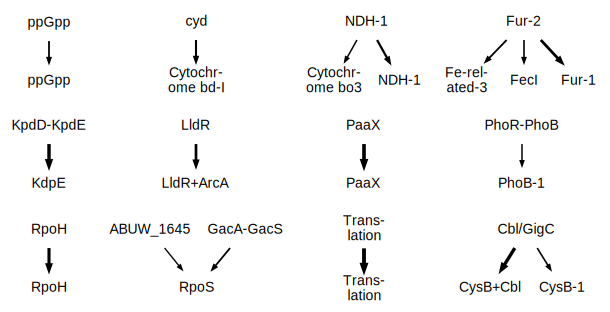

In [10]:
dots

# Comparing Abaum iModulons to P. aeruginosa iModulons

In [11]:
#Load BBH file
bbh_paeru = pd.read_csv("../data/external/acb_vs_pae.csv")
bbh_paeru.head()

,Unnamed: 0,gene,subject,PID,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore,gene_length,COV,BBH
0,0,ABUW_0001,PA0001,45.205,511,232,3,2,465,5,514,1.580000e-145,423.0,465,1.098925,<=>
1,2,ABUW_0002,PA0002,47.781,383,183,6,1,382,1,367,4.320000e-113,332.0,382,1.002618,<=>
2,3,ABUW_0003,PA0003,37.190,363,218,5,1,356,1,360,2.400000e-71,224.0,360,1.008333,<=>
3,4,ABUW_0004,PA0004,65.169,801,270,4,18,816,6,799,0.000000e+00,1042.0,822,0.974453,<=>
4,11,ABUW_0007,PA5252,57.076,643,267,4,1,642,1,635,0.000000e+00,677.0,643,1.000000,<=>


In [12]:
#load paeru iModulome .json file
paeru_ica = load_json_model('../data/external/paeru.json')

In [13]:
paeru_ica.M.head()

,NarL-1,DhcR,Uncharacterized-1,EatR,AtuR,HexR-1,ArgR-1,AntR,EutR,PmrA,...,Cell Division,MdcR,LexA,AmiR,Uncharacterized-14,Uncharacterized-15,Uncharacterized-16,Translational-3,AcoR,Uncharacterized-17
PA0001,-0.001776,-0.011492,-0.005810,-0.001476,0.008095,-0.000116,0.004975,-0.006371,0.005519,0.000459,...,0.000992,-0.007524,0.000380,0.004427,-0.002329,-0.016018,0.003467,-0.005188,-0.002881,-0.001487
PA0002,-0.005393,-0.007495,0.001312,-0.005358,0.012951,-0.000871,0.000518,-0.005964,0.001841,-0.001805,...,0.001211,-0.009940,0.004650,0.003710,0.000914,-0.012555,0.002640,-0.016360,-0.002205,0.000764
PA0003,0.007267,-0.012053,-0.015541,-0.007606,-0.005152,-0.001478,-0.003191,0.001838,0.003252,-0.001066,...,-0.006437,-0.007080,-0.002707,0.007270,0.008534,-0.004491,-0.007109,-0.008023,0.014357,-0.003496
PA0004,0.001858,-0.001039,-0.002193,-0.002362,-0.002556,0.001095,-0.001135,-0.000930,-0.007366,-0.001120,...,0.002295,-0.005862,0.007707,-0.000782,-0.002567,-0.004380,0.000110,-0.014077,0.005730,0.000165
PA0005,-0.005459,0.001290,0.005342,0.002208,-0.006422,-0.002729,-0.005139,-0.007693,-0.010484,-0.002262,...,0.002799,0.015157,0.000340,-0.004168,0.008806,-0.007766,-0.006480,-0.004821,0.003796,-0.010534


In [14]:
links,dots = compare_ica(ica_data.M,paeru_ica.M,
                         ortho_file = bbh_paeru)
links

[('Fur-1', 'FoxR', 0.26644616627442014),
 ('BfmR-BfmS', 'PprB', 0.4113974160537852),
 ('Fur-2', 'PchR', 0.3222475534128434),
 ('Fur-2', 'FoxR', 0.3286526112447587),
 ('Cbl/GigC', 'CysB-1', 0.29956278534277037),
 ('Cbl/GigC', 'CysB-2', 0.6073559750383565),
 ('ABUW_1645', 'RpoS-1', 0.27818913792092054),
 ('Acetoin/butanediol', 'AcoR', 0.27719251118237986),
 ('adeB KO', 'TagR1', 0.31340652804879715),
 ('Tyrosine', 'PhhR', 0.39615544816516113),
 ('mumR', 'AmiE', 0.4446398140193338),
 ('Translation', 'Translational-1', 0.737110505232891),
 ('Type IV Pili', 'AmrZ', 0.38211046221618306),
 ('Unc-9', 'ErbR-1', 0.2672900431389419),
 ('Leucine', 'LiuR', 0.500916898812608),
 ('KpdD-KpdE', 'PhnR-2', 0.4367756801210072),
 ('ppGpp', 'Translational-3', 0.4580540115039454),
 ('RpoH', 'RpoH', 0.48508514546634657)]

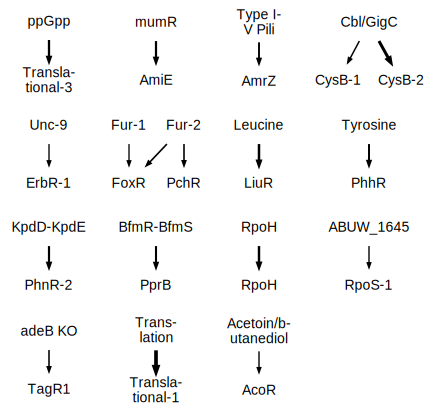

In [15]:
dots

## A) Comparing gene weights of RpoH from E. coli 

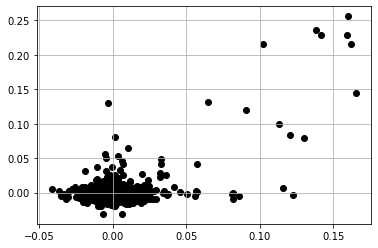

In [16]:
ecoliM = ica_data.M.loc[ica_data.M.index.intersection(bbh_ecoli.gene.values)]
ecoliM = ecoliM.rename(index = dict(bbh_ecoli[['gene','subject']].values)).drop(['b2624', 'b0769'])
plt.scatter(ecoliM['RpoH'],ecoli_ica.M.loc[ecoliM.index,'RpoH'], c='black')
plt.grid()
#plt.savefig("../figures/SuppFigure1a.svg",transparent=True)

## B) Comparing gene weights of RpoH from P. aeruginosa 

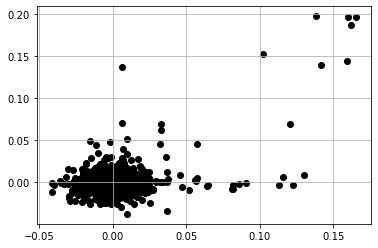

In [17]:
paeruM = ica_data.M.loc[ica_data.M.index.intersection(bbh_paeru.gene.values)]
paeruM = paeruM.rename(index = dict(bbh_paeru[['gene','subject']].values))
plt.scatter(paeruM['RpoH'],paeru_ica.M.loc[paeruM.index,'RpoH'], c='black')
plt.grid()
#plt.savefig("../figures/SuppFigure1b.svg",transparent=True)

# Fig S2:  iModulon gene weight plot comparing GacA-GacS and PaaX iModulons

/Users/nitasha/Documents/MacBook/PhD/AB_Project/Modulome/GitHub/pymodulon/src/pymodulon/plotting.py:1009: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  component_genes = component_genes_x & component_genes_y


<AxesSubplot:xlabel='GacA-GacS Gene Weight', ylabel='PaaX Gene Weight'>

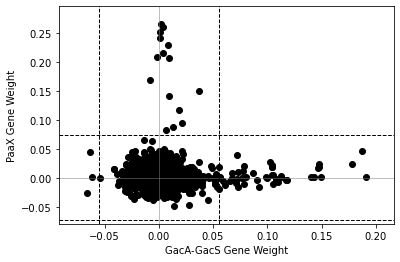

In [18]:
compare_gene_weights(ica_data, 'GacA-GacS', 'PaaX', colors='black')
#plt.savefig("../figures/SuppFigure2e.svg",transparent=True)

# Fig S3: iModulon gene weight plots comparing ABUW_1645, GacA-GacS, and RpoS. 


## A) Compare gene weights of E.coli RpoS iModulon to ABUW_1645

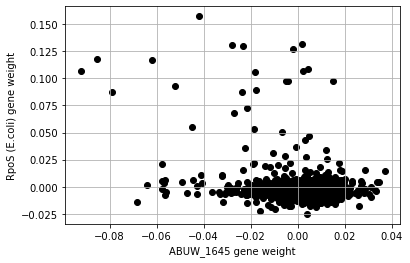

In [19]:
plt.scatter(ecoliM['ABUW_1645'],ecoli_ica.M.loc[ecoliM.index,'RpoS'], c='black')
plt.xlabel("ABUW_1645 gene weight")
plt.ylabel("RpoS (E.coli) gene weight")
plt.grid()
#plt.savefig("../figures/SuppFigure2a.svg",transparent=True)

## B) Compare gene weights of E.coli RpoS iModulon to GacA-GacS

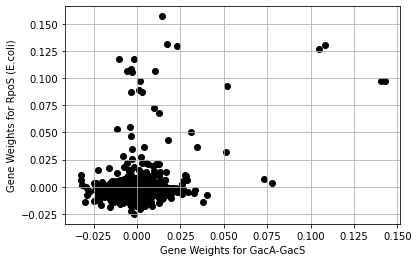

In [15]:
plt.scatter(ecoliM['GacA-GacS'],ecoli_ica.M.loc[ecoliM.index,'RpoS'], c='black')
plt.xlabel("Gene Weights for GacA-GacS")
plt.ylabel("Gene Weights for RpoS (E.coli)")
plt.grid()
#plt.savefig("../figures/SuppFigure2b.svg",transparent=True)

## C) Compare gene weights of P. aeruginosa RpoS-1 iModulon to ABUW_1645

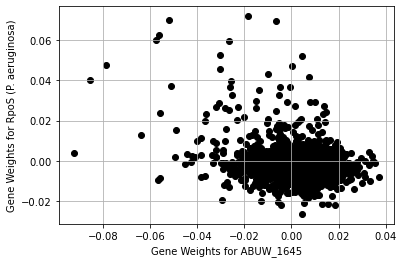

In [40]:
plt.scatter(paeruM['ABUW_1645'],paeru_ica.M.loc[paeruM.index,'RpoS-1'], c='black')
plt.xlabel("Gene Weights for ABUW_1645")
plt.ylabel("Gene Weights for RpoS (P. aeruginosa)")
plt.grid()
#plt.savefig("../figures/SuppFigure2c.svg",transparent=True)

# Fig S4: Gene weights of the Translation/ppGpp iModulon


## A) Gene weights of the Translation iModulon 

<AxesSubplot:xlabel='Gene Start', ylabel='Translation Gene Weight'>

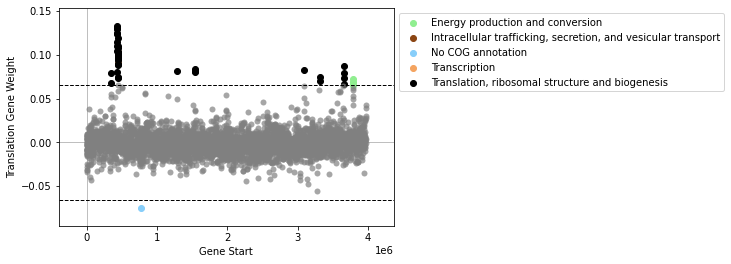

In [22]:
plot_gene_weights(ica_data, 'Translation')

## B) Gene weights of the ppGpp iModulon

<AxesSubplot:xlabel='Gene Start', ylabel='ppGpp Gene Weight'>

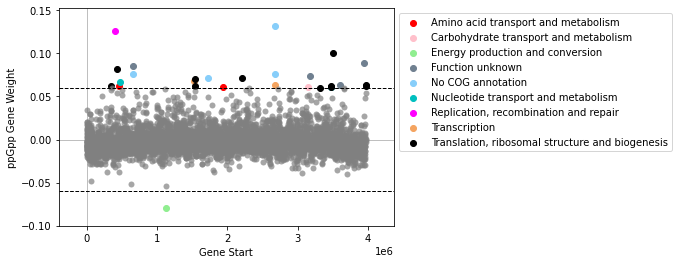

In [21]:
plot_gene_weights(ica_data, 'ppGpp')

## C) Compare gene weights of E.coli ppGpp iModulon to ppGpp

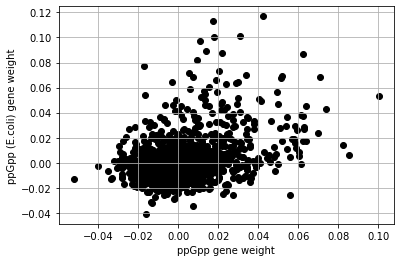

In [20]:
plt.scatter(ecoliM['ppGpp'],ecoli_ica.M.loc[ecoliM.index,'ppGpp'], c='black')
plt.xlabel("ppGpp gene weight")
plt.ylabel("ppGpp (E.coli) gene weight")
plt.grid()
#plt.savefig("../figures/SuppFigure3c.svg",transparent=True)

# Fig S5: p1AB5075 associated iModulons

## A) Comparing gene weights between R7 mutant and HGT

/Users/nitasha/Documents/MacBook/PhD/AB_Project/Modulome/GitHub/pymodulon/src/pymodulon/plotting.py:1009: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  component_genes = component_genes_x & component_genes_y


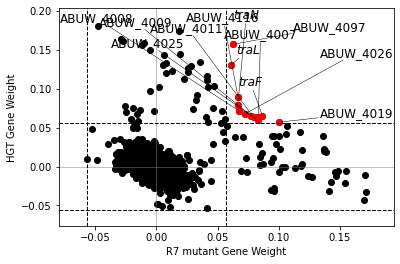

In [13]:
compare_gene_weights(ica_data, 'R7 mutant', 'HGT', colors='black')
#plt.savefig("../figures/SuppFigure4a.svg",transparent = True)

## B) Comparing gene weights between R7 mutant and AMR

/Users/nitasha/Documents/MacBook/PhD/AB_Project/Modulome/GitHub/pymodulon/src/pymodulon/plotting.py:1009: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  component_genes = component_genes_x & component_genes_y


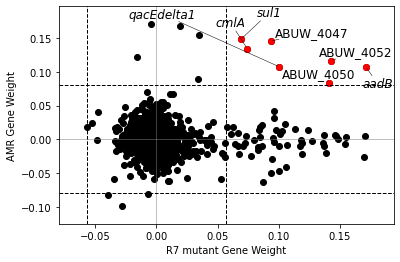

In [14]:
compare_gene_weights(ica_data, 'R7 mutant', 'AMR', colors='black')
#plt.savefig("../figures/SuppFigure4b.svg",transparent = True)

## C) Comparing gene weights between HGT and AMR

/Users/nitasha/Documents/MacBook/PhD/AB_Project/Modulome/GitHub/pymodulon/src/pymodulon/plotting.py:1009: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  component_genes = component_genes_x & component_genes_y


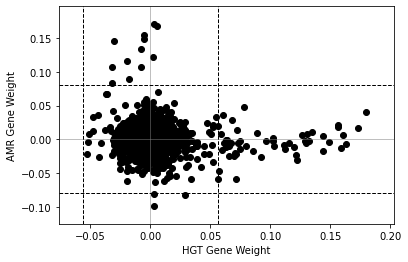

In [15]:
compare_gene_weights(ica_data, 'HGT', 'AMR', colors='black')
#plt.savefig("../figures/SuppFigure4c.svg",transparent = True)

## D) Comparing genes in p1AB5075 associated iModulons

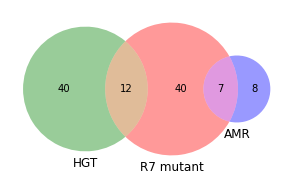

In [6]:
# Visualize iModulons/Regulons with Venn Diagram
fig,ax = plt.subplots(figsize=[5,5])
R7_imod = set(ica_data.view_imodulon("R7 mutant").index)
HGT_imod = set(ica_data.view_imodulon("HGT").index)
AMR_imod = set(ica_data.view_imodulon("AMR").index)
venn3([R7_imod, HGT_imod, AMR_imod],["R7 mutant","HGT", 'AMR'])

#plt.savefig("../figures/SuppFigure4d.svg",transparent=True)